# DM2020 Final Project
105208036 經濟四 顏廷 

### 要嘗試的方法：

- [x] SMOTE, oversampling
- [x] 降維（PCA)
- [x] 用不同演算法 ex. xgboost
- [x] 將numeric features做平方或者開根號等轉換
- [x] 用bagging的方法來做預測

In [108]:
## Import Library ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## For Data Encoding ##
from sklearn.preprocessing import LabelEncoder

## For Model Evaluation ##
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

## Machine Learning Model ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


## For Model Performance ##
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

### Data Understanding

In [109]:
## Model Performance
def evaluation(gt, pred):
    acc = accuracy_score(gt, pred)
    precision = precision_score(gt, pred)
    recall = recall_score(gt, pred)
    f1 = f1_score(gt, pred)
    matrix = confusion_matrix(gt, pred)
    
    return acc, precision, recall, f1, matrix

In [110]:
raw_data = pd.read_csv("./Employee-Attrition.csv")
raw_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [111]:
# 看有哪些features
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [112]:
# 確認有無缺失值
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [113]:
# 將 categorical 和 numeric 的 features 分出來
categorical_col = []
numeric_col = []
for col in raw_data.columns:
    if raw_data[col].dtype == object and col != "Attrition":
        categorical_col.append(col)
        print(col, raw_data[col].unique())
        print("========================================================================")
    elif raw_data[col].dtype == int and col != "Attrition":
        numeric_col.append(col)

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']


In [114]:
## Encode Label
raw_data["Attrition"] = raw_data["Attrition"].astype("category").cat.codes
raw_data["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

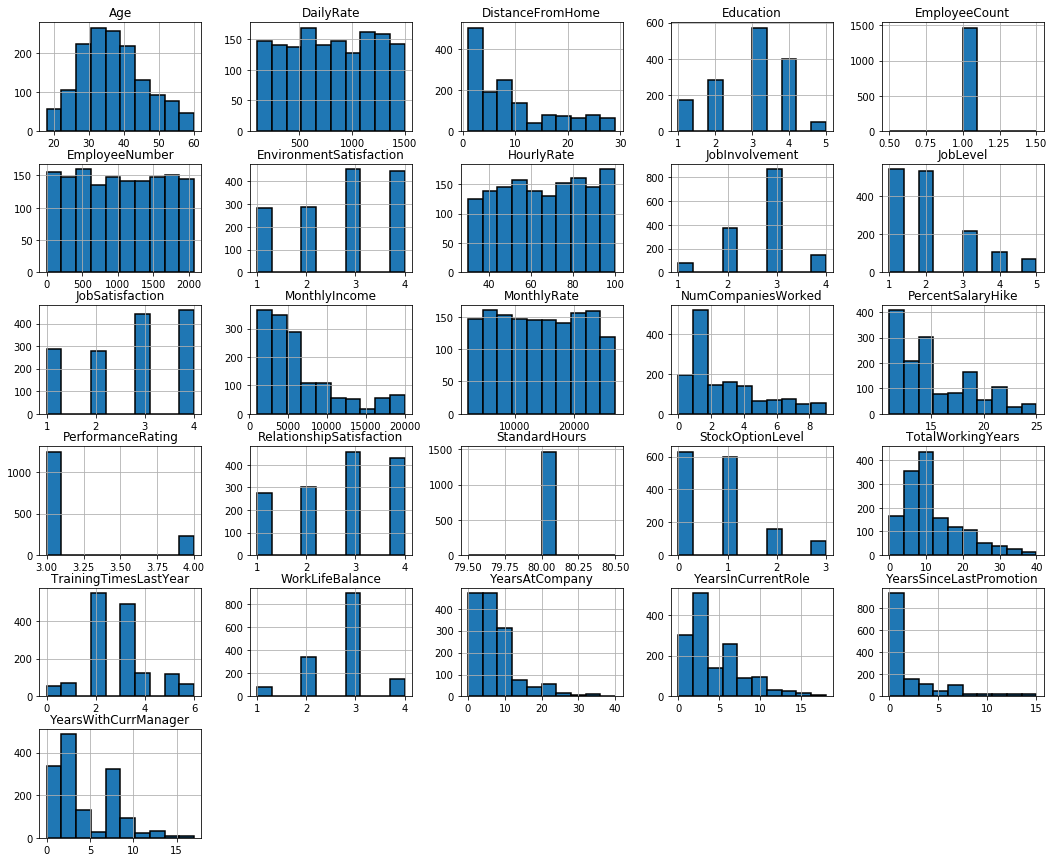

In [115]:
## Data Visualization for numerical data
raw_data[numeric_col].hist(edgecolor='black', linewidth=1.5, figsize=(18, 15))
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

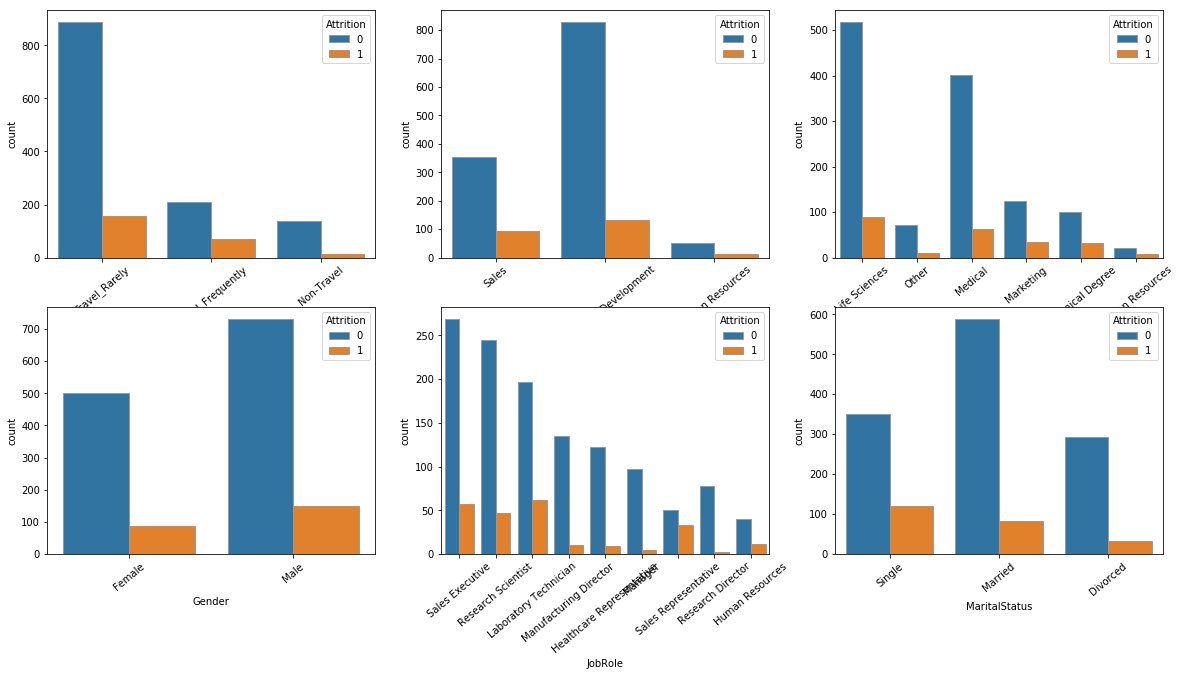

In [116]:
## Data Visualization for categorical data
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for index, col in enumerate(categorical_col):
    row_num = int(index / 3)
    col_num = (index % 3)
    label = list(raw_data[col].unique())
    sns.countplot(x=str(col), hue="Attrition", edgecolor=".6", data=raw_data, ax = axes[row_num, col_num])
    axes[row_num, col_num].set_xticklabels(label, rotation=40)
plt.tight_layout()
plt.show()

In [117]:
## Data Encoding (one-hot encoding)
one_hot_encoding_df = pd.get_dummies(raw_data, columns=categorical_col)

### Adaboost

In [154]:
## Data Splitting and Model Learning (Adaboost)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    
    train_X = df.loc[train_index]
    train_y = raw_data.loc[train_index]["Attrition"]
    test_X = df.loc[test_index]
    test_y = raw_data.loc[test_index]["Attrition"]
    
    clf1 = AdaBoostClassifier(n_estimators=200, random_state=0)
    clf1.fit(train_X, train_y)
    test_predict1 = clf1.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.776000, Precision: 0.087000, Recall: 0.043000, F1: 0.057000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.789000, Precision: 0.087000, Recall: 0.047000, F1: 0.061000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.776000, Precision: 0.348000, Recall: 0.136000, F1: 0.195000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.789000, Precision: 0.130000, Recall: 0.067000, F1: 0.088000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.905000, Precision: 0.826000, Recall: 0.442000, F1: 0.576000
Avg Accuracy: 0.807000, Avg Precision: 0.296000, Avg Recall: 0.147000, Avg F1: 0.195000


### Feature Engineering : PCA
### Model Learning & Evaluating 

In [120]:
len(raw_data.columns)

35

In [121]:
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [122]:
from sklearn.preprocessing import StandardScaler
# 將數據標準化
raw_data_standard = StandardScaler().fit_transform(raw_data[numeric_col])

from sklearn.decomposition import PCA

# 看哪些features解釋力低，可以刪掉
pca = PCA(n_components=19)
pca.fit(raw_data_standard)
x_pca = pca.transform(raw_data_standard)
print(sum(pca.explained_variance_ratio_))


0.9625022343879107


In [123]:
# 第25的features的解釋力很低，取24個
n = 19
columns = []
for i in range(n):
    columns.append(f'principal_component_{i}')

In [124]:
raw_data_standard_pca = pd.DataFrame(data = x_pca, columns = columns)
raw_data_standard_pca

,principal_component_0,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9,principal_component_10,principal_component_11,principal_component_12,principal_component_13,principal_component_14,principal_component_15,principal_component_16,principal_component_17,principal_component_18
0,-0.325733,-1.618563,0.160900,-0.301475,2.189460,1.248929,1.614237,1.244204,0.252745,-2.722789,0.060719,-1.710645,1.076564,1.132228,0.008574,0.370096,1.735289,-0.072732,-0.837162
1,0.623915,2.580797,1.947458,-1.900596,-0.415873,-1.356752,0.528755,-0.641745,1.311628,0.123015,-0.546806,0.395796,0.280145,1.426883,1.256352,0.646723,-0.088659,-1.875930,-0.081329
2,-2.406061,-1.106934,0.496746,-0.866196,1.450875,0.135383,-1.344269,-0.678949,-0.165894,-1.582302,-1.499784,0.095219,0.997800,-0.723144,-0.915648,1.366352,1.325722,-0.124907,0.272484
3,-0.852787,-0.264320,-1.335010,-1.356944,1.234743,-0.190950,0.240475,-1.264153,-0.549609,0.190503,1.055352,-0.661391,2.031466,-0.699524,0.122346,0.232505,-0.610075,0.086775,0.532567
4,-1.880592,-1.098928,-0.342640,-1.444629,1.093032,-1.390458,-0.453521,0.256472,0.389999,0.028746,-0.480317,0.146790,-0.426614,1.023329,2.661165,-0.932240,2.150634,0.799164,-0.458583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.757696,-0.358906,0.354758,0.556846,-0.024382,0.985209,0.683252,-0.803266,-0.048183,1.701090,0.817945,0.128243,-2.230922,-0.477714,-0.500820,-0.734333,1.239408,-0.415468,-0.154358
1466,0.826071,0.044774,-0.547484,-0.658629,-3.100003,0.644720,-1.026154,-1.329909,0.985376,-1.364340,0.767180,0.683702,-0.866525,-0.545263,0.911476,-0.219710,0.904493,-0.403481,-0.832852
1467,-1.252962,1.770514,1.719307,1.993277,-0.629538,-1.094868,0.227277,0.565379,-1.213759,-0.877576,-0.447522,-1.855586,-2.335950,0.968390,-0.758297,-0.340621,-0.886099,0.551579,-0.302848
1468,0.978314,-0.504802,-0.467174,-0.187042,-0.386112,-0.356310,0.016908,-0.584708,-0.370071,-1.281547,0.713621,1.850576,0.180424,0.114229,-1.508308,-1.051649,-0.487996,-1.811912,-0.473597


In [125]:
## Data Encoding (one-hot encoding)
one_hot_encoding_df_catog = pd.get_dummies(raw_data[categorical_col], columns=categorical_col)

In [126]:
## 將pca後的numeric features和catogorical features合併
df = pd.concat([one_hot_encoding_df_catog, raw_data_standard_pca], axis = 1)

In [93]:
## Data Splitting and Model Learning (Logistic Regression)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    
    train_X = df.loc[train_index]
    train_y = raw_data.loc[train_index]["Attrition"]
    test_X = df.loc[test_index]
    test_y = raw_data.loc[test_index]["Attrition"]
    
    model = LogisticRegression(solver='liblinear')
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.912000, Precision: 0.800000, Recall: 0.596000, F1: 0.683000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.888000, Precision: 0.679000, Recall: 0.442000, F1: 0.535000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.837000, Precision: 0.690000, Recall: 0.339000, F1: 0.455000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.901000, Precision: 0.767000, Recall: 0.511000, F1: 0.613000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.905000, Precision: 0.826000, Recall: 0.442000, F1: 0.576000
Avg Accuracy: 0.888000, Avg Precision: 0.752000, Avg Recall: 0.466000, Avg F1: 0.572000


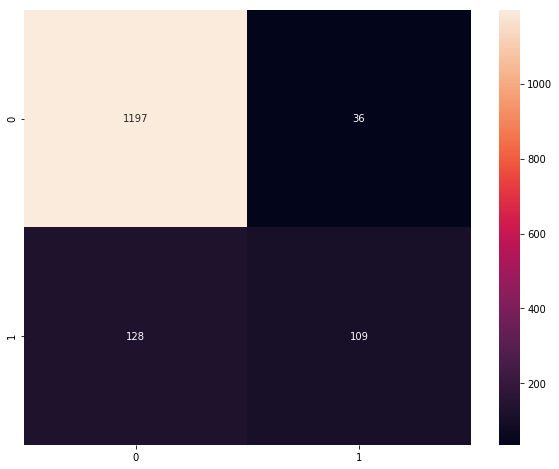

In [94]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [78]:
## Data Splitting and Model Learning (XGBClassifier)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    
    train_X = df.loc[train_index]
    train_y = raw_data.loc[train_index]["Attrition"]
    test_X = df.loc[test_index]
    test_y = raw_data.loc[test_index]["Attrition"]
    
    model = XGBClassifier()
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.871000, Precision: 0.765000, Recall: 0.277000, F1: 0.406000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.864000, Precision: 0.565000, Recall: 0.302000, F1: 0.394000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.837000, Precision: 0.762000, Recall: 0.271000, F1: 0.400000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.881000, Precision: 0.708000, Recall: 0.378000, F1: 0.493000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.881000, Precision: 0.722000, Recall: 0.302000, F1: 0.426000
Avg Accuracy: 0.867000, Avg Precision: 0.704000, Avg Recall: 0.306000, Avg F1: 0.424000


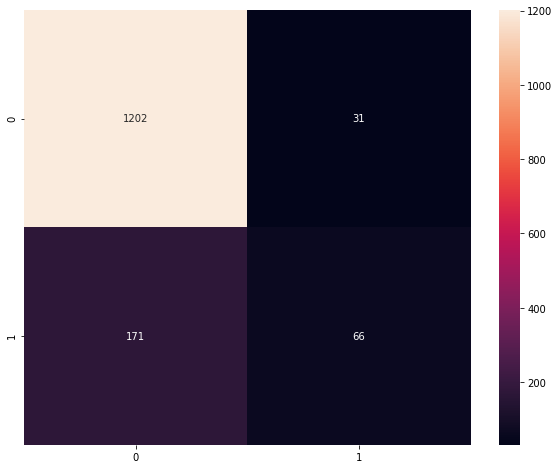

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [79]:
## Data Splitting and Model Learning (Random Forest)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    
    train_X = df.loc[train_index]
    train_y = raw_data.loc[train_index]["Attrition"]
    test_X = df.loc[test_index]
    test_y = raw_data.loc[test_index]["Attrition"]
    
    model = RandomForestClassifier(max_depth = 30)
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.850000, Precision: 1.000000, Recall: 0.064000, F1: 0.120000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.867000, Precision: 0.750000, Recall: 0.140000, F1: 0.235000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.816000, Precision: 0.857000, Recall: 0.102000, F1: 0.182000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.857000, Precision: 0.800000, Recall: 0.089000, F1: 0.160000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.861000, Precision: 0.667000, Recall: 0.093000, F1: 0.163000
Avg Accuracy: 0.850000, Avg Precision: 0.815000, Avg Recall: 0.097000, Avg F1: 0.172000


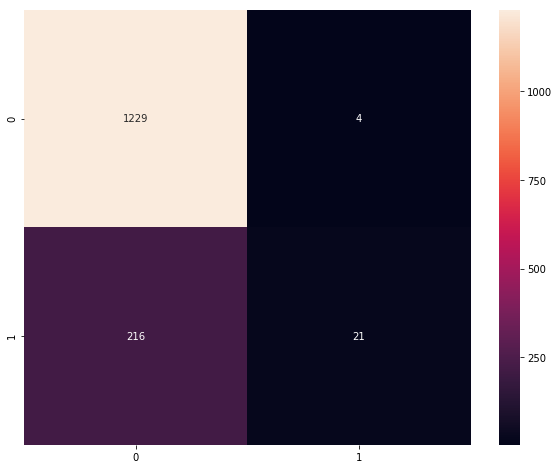

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

### Feature Engineering : SMOTE
### Model Learning & Evaluating 

In [96]:
from imblearn.over_sampling import SMOTENC

In [33]:
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [100]:
## Data Splitting and Model Learning (Logistic Regression)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(raw_data):
    
    train_X = raw_data.loc[train_index, raw_data.columns != 'Attrition']
    train_y = raw_data.loc[train_index]["Attrition"]
    test_X = raw_data.loc[test_index, raw_data.columns != 'Attrition']
    test_y = raw_data.loc[test_index]["Attrition"]
    
    # Smote
    categorical_features = [train_X.columns.get_loc(c) for c in categorical_col if c in train_X]
    smote_nc = SMOTENC(categorical_features=categorical_features, random_state=0, k_neighbors=5)
    X_resampled, y_resampled = smote_nc.fit_resample(train_X,  train_y)
    
    ## Data Encoding (one-hot encoding)
    one_hot_encoding_df_train = pd.get_dummies(X_resampled, columns=categorical_col)
    one_hot_encoding_df_test = pd.get_dummies(test_X, columns=categorical_col)
    
    print("Training Data: %d, Testing Data: %d" % (len(X_resampled), len(test_index)))
    
    model = LogisticRegression(solver='liblinear')
    model = model.fit(one_hot_encoding_df_train, y_resampled)
    test_predict = model.predict(one_hot_encoding_df_test)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.840000, Precision: 0.500000, Recall: 0.745000, F1: 0.598000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.813000, Precision: 0.403000, Recall: 0.581000, F1: 0.476000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.776000, Precision: 0.446000, Recall: 0.492000, F1: 0.468000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.796000, Precision: 0.400000, Recall: 0.667000, F1: 0.500000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.806000, Precision: 0.391000, Recall: 0.581000, F1: 0.467000
Avg Accuracy: 0.806000, Avg Precision: 0.428000, Avg Recall: 0.613000, Avg F1: 0.502000


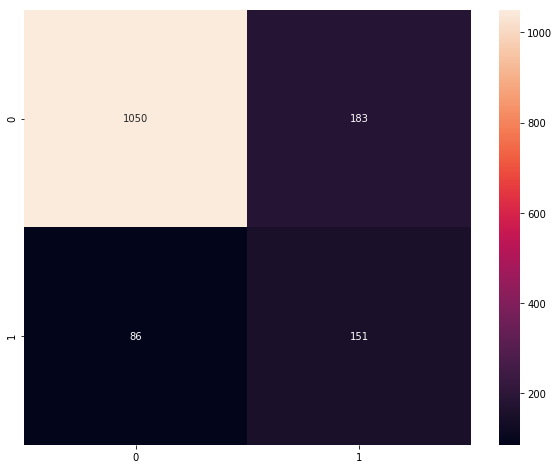

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [36]:
## Data Splitting and Model Learning (XGBClassifier)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(raw_data):
    
    train_X = raw_data.loc[train_index, raw_data.columns != 'Attrition']
    train_y = raw_data.loc[train_index]["Attrition"]
    test_X = raw_data.loc[test_index, raw_data.columns != 'Attrition']
    test_y = raw_data.loc[test_index]["Attrition"]
    
    # Smote
    categorical_features = [train_X.columns.get_loc(c) for c in categorical_col if c in train_X]
    smote_nc = SMOTENC(categorical_features=categorical_features, random_state=0)
    X_resampled, y_resampled = smote_nc.fit_resample(train_X,  train_y)
    
    ## Data Encoding (one-hot encoding)
    one_hot_encoding_df_train = pd.get_dummies(X_resampled, columns=categorical_col)
    one_hot_encoding_df_test = pd.get_dummies(test_X, columns=categorical_col)
    
    print("Training Data: %d, Testing Data: %d" % (len(X_resampled), len(test_index)))
    
    model = XGBClassifier()
    model = model.fit(one_hot_encoding_df_train, y_resampled)
    test_predict = model.predict(one_hot_encoding_df_test)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.864000, Precision: 0.621000, Recall: 0.383000, F1: 0.474000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.878000, Precision: 0.585000, Recall: 0.558000, F1: 0.571000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.827000, Precision: 0.591000, Recall: 0.441000, F1: 0.505000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.833000, Precision: 0.462000, Recall: 0.533000, F1: 0.495000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.878000, Precision: 0.769000, Recall: 0.233000, F1: 0.357000
Avg Accuracy: 0.856000, Avg Precision: 0.606000, Avg Recall: 0.430000, Avg F1: 0.480000


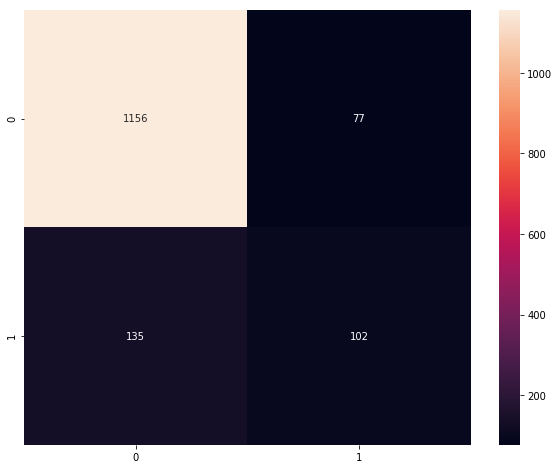

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [106]:
## Data Splitting and Model Learning (Random Forest)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(raw_data):
    
    train_X = raw_data.loc[train_index, raw_data.columns != 'Attrition']
    train_y = raw_data.loc[train_index]["Attrition"]
    test_X = raw_data.loc[test_index, raw_data.columns != 'Attrition']
    test_y = raw_data.loc[test_index]["Attrition"]
    
    # Smote
    categorical_features = [train_X.columns.get_loc(c) for c in categorical_col if c in train_X]
    smote_nc = SMOTENC(categorical_features=categorical_features, random_state=0, k_neighbors=5)
    X_resampled, y_resampled = smote_nc.fit_resample(train_X,  train_y)
    
    ## Data Encoding (one-hot encoding)
    one_hot_encoding_df_train = pd.get_dummies(X_resampled, columns=categorical_col)
    one_hot_encoding_df_test = pd.get_dummies(test_X, columns=categorical_col)
    
    print("Training Data: %d, Testing Data: %d" % (len(X_resampled), len(test_index)))
    
    model = RandomForestClassifier(max_depth = 30)
    model = model.fit(one_hot_encoding_df_train, y_resampled)
    test_predict = model.predict(one_hot_encoding_df_test)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.867000, Precision: 0.654000, Recall: 0.362000, F1: 0.466000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.874000, Precision: 0.583000, Recall: 0.488000, F1: 0.532000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.837000, Precision: 0.628000, Recall: 0.458000, F1: 0.529000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.850000, Precision: 0.513000, Recall: 0.444000, F1: 0.476000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.878000, Precision: 0.630000, Recall: 0.395000, F1: 0.486000
Avg Accuracy: 0.861000, Avg Precision: 0.602000, Avg Recall: 0.429000, Avg F1: 0.498000


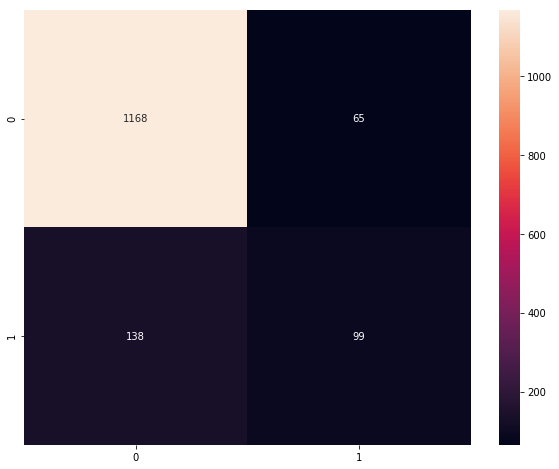

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

### Feature Engineering : Oversampling
### Model Learning & Evaluating 

In [41]:
from imblearn.over_sampling import RandomOverSampler

In [42]:
## Data Splitting and Model Learning (Logistic Regression)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):

    
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    # Oversampling
    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(train_X, train_y)
    
    print("Training Data: %d, Testing Data: %d" % (len(X_resampled), len(test_index)))
    
    model = LogisticRegression(solver='liblinear')
    model = model.fit(X_resampled, y_resampled)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.810000, Precision: 0.446000, Recall: 0.787000, F1: 0.569000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.755000, Precision: 0.341000, Recall: 0.721000, F1: 0.463000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.748000, Precision: 0.419000, Recall: 0.661000, F1: 0.513000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.728000, Precision: 0.333000, Recall: 0.778000, F1: 0.467000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.755000, Precision: 0.344000, Recall: 0.744000, F1: 0.471000
Avg Accuracy: 0.759000, Avg Precision: 0.377000, Avg Recall: 0.738000, Avg F1: 0.496000


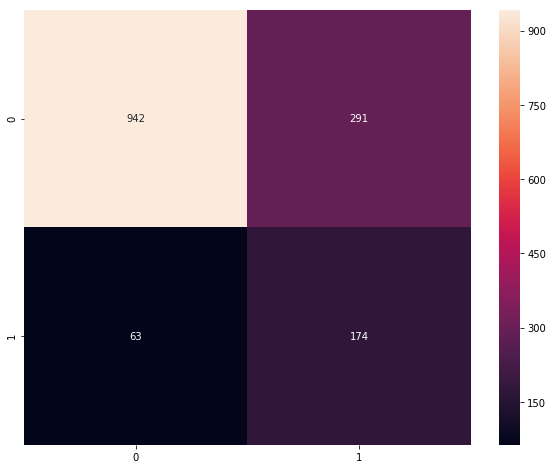

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [45]:
## Data Splitting and Model Learning (XGBClassifier)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    # Oversampling
    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(train_X, train_y)
    
    print("Training Data: %d, Testing Data: %d" % (len(X_resampled), len(test_index)))
    
    model = XGBClassifier()
    model = model.fit(X_resampled, y_resampled)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.847000, Precision: 0.550000, Recall: 0.234000, F1: 0.328000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.881000, Precision: 0.618000, Recall: 0.488000, F1: 0.545000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.827000, Precision: 0.618000, Recall: 0.356000, F1: 0.452000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.861000, Precision: 0.553000, Recall: 0.467000, F1: 0.506000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.881000, Precision: 0.750000, Recall: 0.279000, F1: 0.407000
Avg Accuracy: 0.859000, Avg Precision: 0.618000, Avg Recall: 0.365000, Avg F1: 0.448000


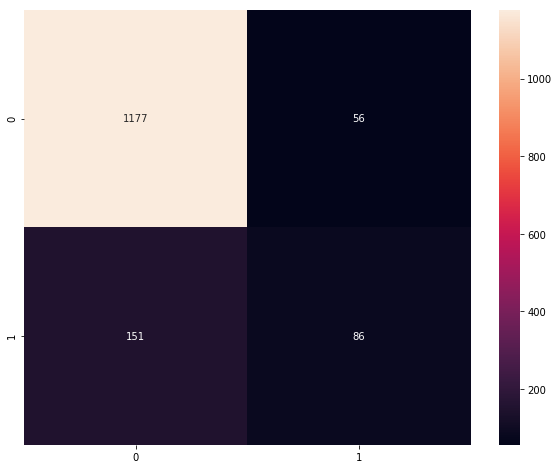

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [47]:
## Data Splitting and Model Learning (Random Forest)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    # Oversampling
    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(train_X, train_y)
    
    print("Training Data: %d, Testing Data: %d" % (len(X_resampled), len(test_index)))
    
    model = RandomForestClassifier(max_depth = 30)
    model = model.fit(X_resampled, y_resampled)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1972, Testing Data: 294
Fold: 1, Accuracy: 0.854000, Precision: 0.750000, Recall: 0.128000, F1: 0.218000
Training Data: 1964, Testing Data: 294
Fold: 2, Accuracy: 0.861000, Precision: 0.542000, Recall: 0.302000, F1: 0.388000
Training Data: 1996, Testing Data: 294
Fold: 3, Accuracy: 0.830000, Precision: 0.737000, Recall: 0.237000, F1: 0.359000
Training Data: 1968, Testing Data: 294
Fold: 4, Accuracy: 0.871000, Precision: 0.630000, Recall: 0.378000, F1: 0.472000
Training Data: 1964, Testing Data: 294
Fold: 5, Accuracy: 0.874000, Precision: 0.750000, Recall: 0.209000, F1: 0.327000
Avg Accuracy: 0.858000, Avg Precision: 0.682000, Avg Recall: 0.251000, Avg F1: 0.353000


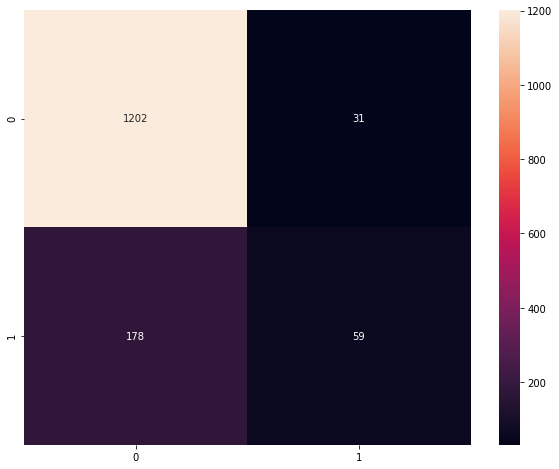

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

### Feature Engineering : 將numeric features做平方或者開根號等轉換
### Model Learning & Evaluating 

In [128]:
raw_data_num = raw_data[numeric_col]
raw_data_num

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [129]:
# 將新features平方
raw_data_num_square = np.square(raw_data_num)

# 創造新features的名字
raw_data_num_square_names = []
for i in range(len(raw_data_num.columns)):
    raw_data_num_square_names.append(raw_data_num.columns[i] + '**2')

# 更改名字
raw_data_num_square.columns = raw_data_num_square_names

# 合併新和舊的features
raw_data_num0 = pd.concat([raw_data_num_square, raw_data_num], axis = 1)

# 將numeric和catogorical features合併
raw_data0 = pd.concat([raw_data_num0, raw_data[categorical_col], raw_data['Attrition']], axis = 1)

## Data Encoding (one-hot encoding)
one_hot_encoding_df = pd.get_dummies(raw_data0, columns=categorical_col)

In [72]:
## Data Splitting and Model Learning (Logistic Regression)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):

    
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    
    model = LogisticRegression(solver='liblinear')
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.840000, Precision: 0.000000, Recall: 0.000000, F1: 0.000000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.854000, Precision: 0.000000, Recall: 0.000000, F1: 0.000000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.799000, Precision: 0.000000, Recall: 0.000000, F1: 0.000000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.847000, Precision: 0.000000, Recall: 0.000000, F1: 0.000000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.854000, Precision: 0.000000, Recall: 0.000000, F1: 0.000000
Avg Accuracy: 0.839000, Avg Precision: 0.000000, Avg Recall: 0.000000, Avg F1: 0.000000


/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classifica

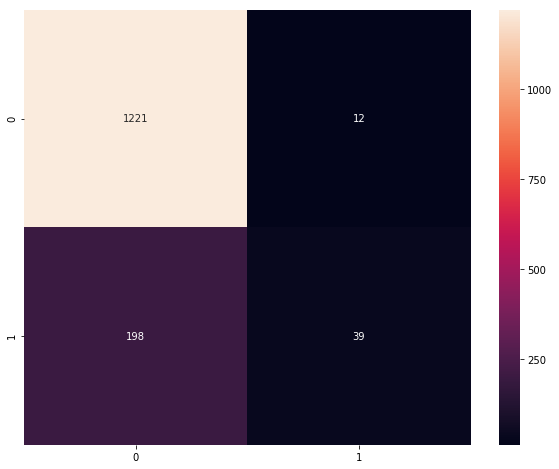

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [118]:
## Data Splitting and Model Learning (XGBClassifier)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):

    
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    
    model = XGBClassifier()
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.857000, Precision: 0.692000, Recall: 0.191000, F1: 0.300000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.878000, Precision: 0.640000, Recall: 0.372000, F1: 0.471000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.827000, Precision: 0.633000, Recall: 0.322000, F1: 0.427000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.871000, Precision: 0.595000, Recall: 0.489000, F1: 0.537000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.891000, Precision: 0.867000, Recall: 0.302000, F1: 0.448000
Avg Accuracy: 0.865000, Avg Precision: 0.685000, Avg Recall: 0.335000, Avg F1: 0.436000


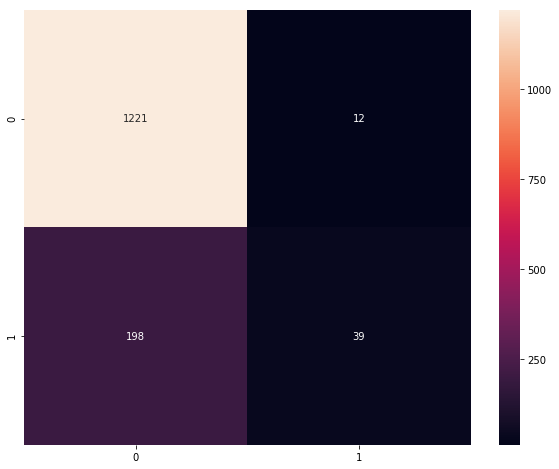

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [75]:
## Data Splitting and Model Learning (RandomForestClassifier)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):

    
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    
    model = RandomForestClassifier(max_depth = 30)
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.850000, Precision: 0.714000, Recall: 0.106000, F1: 0.185000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.884000, Precision: 0.909000, Recall: 0.233000, F1: 0.370000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.823000, Precision: 0.818000, Recall: 0.153000, F1: 0.257000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.864000, Precision: 0.692000, Recall: 0.200000, F1: 0.310000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.864000, Precision: 0.667000, Recall: 0.140000, F1: 0.231000
Avg Accuracy: 0.857000, Avg Precision: 0.760000, Avg Recall: 0.166000, Avg F1: 0.271000


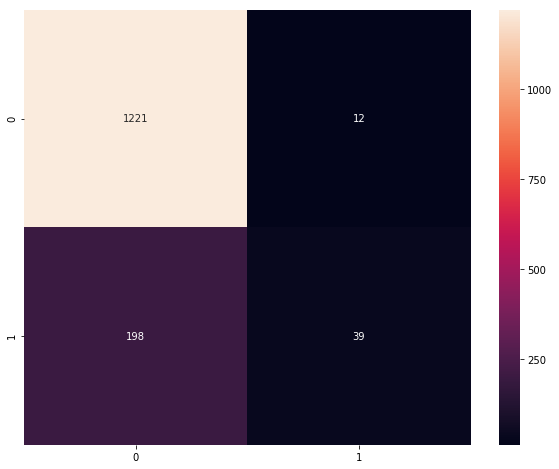

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

### Bagging + PCA

In [116]:
## Data Splitting and Model Learning (Logistic Regression)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    
    train_X = df.loc[train_index]
    train_y = raw_data.loc[train_index]["Attrition"]
    test_X = df.loc[test_index]
    test_y = raw_data.loc[test_index]["Attrition"]
    
    # Logistic Regression
    model = LogisticRegression(solver='liblinear')
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    # XGBClassifier
    model0 = XGBClassifier()
    model0 = model0.fit(train_X, train_y)
    test_predict0 = model0.predict(test_X)
    
#     # SVM
#     clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#     clf.fit(train_X, train_y)
#     test_predict1 = clf.predict(test_X)
    
    # Adaboost
    clf1 = AdaBoostClassifier(n_estimators=200, random_state=0)
    clf1.fit(train_X, train_y)
    test_predict1 = clf1.predict(test_X)
#     model1 = RandomForestClassifier(max_depth = 30)
#     model1 = model1.fit(train_X, train_y)
#     test_predict1 = model1.predict(test_X)
    
    # 用bagging選擇test
    test_predict_bagging = []

    for i in range(len(test_index)):
        if [test_predict[i], test_predict0[i], test_predict1[i]].count(0) >= 2:
            test_predict_bagging.append(0)
        else:
            test_predict_bagging.append(1)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict_bagging)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.898000, Precision: 0.840000, Recall: 0.447000, F1: 0.583000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.881000, Precision: 0.667000, Recall: 0.372000, F1: 0.478000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.840000, Precision: 0.731000, Recall: 0.322000, F1: 0.447000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.891000, Precision: 0.783000, Recall: 0.400000, F1: 0.529000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.895000, Precision: 0.833000, Recall: 0.349000, F1: 0.492000
Avg Accuracy: 0.881000, Avg Precision: 0.771000, Avg Recall: 0.378000, Avg F1: 0.506000


### Bagging + New Features + PCA

In [135]:
# 將新features平方
raw_data_num_square = np.square(raw_data_num)

# 創造新features的名字
raw_data_num_square_names = []
for i in range(len(raw_data_num.columns)):
    raw_data_num_square_names.append(raw_data_num.columns[i] + '**2')

# 更改名字
raw_data_num_square.columns = raw_data_num_square_names

# 合併新和舊的features
raw_data_num0 = pd.concat([raw_data_num_square, raw_data_num], axis = 1)

In [147]:
# 第25的features的解釋力很低，取24個
n = 23
columns = []
for i in range(n):
    columns.append(f'principal_component_{i}')

In [148]:
raw_data_standard = StandardScaler().fit_transform(raw_data_num0)

# 看哪些features解釋力低，可以刪掉
pca = PCA(n_components=23)
pca.fit(raw_data_standard)
x_pca = pca.transform(raw_data_standard)
print(sum(pca.explained_variance_ratio_))

raw_data_standard_pca = pd.DataFrame(data = x_pca, columns = columns)

0.9835191529095182


In [149]:
# 將numeric和catogorical features合併
raw_data0 = pd.concat([raw_data_standard_pca, raw_data[categorical_col], raw_data['Attrition']], axis = 1)

## Data Encoding (one-hot encoding)
one_hot_encoding_df = pd.get_dummies(raw_data0, columns=categorical_col)

In [150]:
## Data Splitting and Model Learning (RandomForestClassifier)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):

    
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    
   # Logistic Regression
    model = LogisticRegression(solver='liblinear')
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    # XGBClassifier
    model0 = XGBClassifier()
    model0 = model0.fit(train_X, train_y)
    test_predict0 = model0.predict(test_X)
    
#     # SVM
#     clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#     clf.fit(train_X, train_y)
#     test_predict1 = clf.predict(test_X)
    
    # Adaboost
    clf1 = AdaBoostClassifier(n_estimators=200, random_state=0)
    clf1.fit(train_X, train_y)
    test_predict1 = clf1.predict(test_X)
    
    # 用bagging選擇test
    test_predict_bagging = []

    for i in range(len(test_index)):
        if [test_predict[i], test_predict0[i], test_predict1[i]].count(0) >= 2:
            test_predict_bagging.append(0)
        else:
            test_predict_bagging.append(1)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict_bagging)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.874000, Precision: 0.750000, Recall: 0.319000, F1: 0.448000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.888000, Precision: 0.750000, Recall: 0.349000, F1: 0.476000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.850000, Precision: 0.778000, Recall: 0.356000, F1: 0.488000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.891000, Precision: 0.741000, Recall: 0.444000, F1: 0.556000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.891000, Precision: 0.824000, Recall: 0.326000, F1: 0.467000
Avg Accuracy: 0.879000, Avg Precision: 0.768000, Avg Recall: 0.359000, Avg F1: 0.487000


### 結論

* Highest F1-score : PCA + Logistic Regression
* Highest Accuracy : PCA + Logistic Regression
* Highest Precision : PCA + New Features + Bagging
* Highest Recall : PCA + Logistic Regression
----------
* 看使用者覺得Precision和Recall哪個比較重要，可以自行選擇PCA搭配Logistic Regression或者PCA + New Features + Bagging
* PCA + Logistic Regression 的 Test Accuracy 超過Base Line的0.88，但整體效果不大

